In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))

2023-07-26 22:10:46.597059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(  #←---- (本行及以下3行)生成第一个类别的点：1000个二维随机点。协方差矩阵为[[1, 0.5], [0.5, 1]]，对应于一个从左下方到右上方的椭圆形点云
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(  # ←---- (本行及以下3行)生成第二个类别的点，协方差矩阵相同，均值不同
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [6]:
print(inputs)

[[ 0.2147839   3.6776364 ]
 [ 0.11473355  3.2013593 ]
 [ 1.0862454   3.890461  ]
 ...
 [ 2.3152916   0.18989445]
 [ 4.0212226  -0.06261443]
 [ 2.2040071  -0.28463775]]


In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

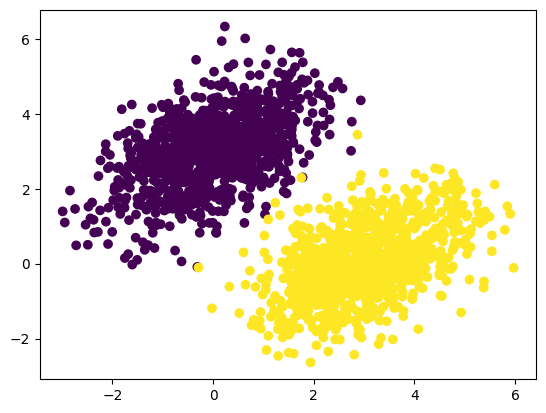

In [8]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [9]:
input_dim = 2 # ←----输入是二维点
output_dim = 1 # ←----每个样本的输出预测值是一个分数值（如果分类器预测样本属于类别0，那么这个分数值会接近0；如果预测样本属于类别1，那么这个分数值会接近1）
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [10]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [11]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) # ←---- per_sample_losses是一个与targets和predictions具有相同形状的张量，其中包含每个样本的损失值
    return tf.reduce_mean(per_sample_losses) # ←----我们需要将每个样本的损失值平均为一个标量损失值，这由reduce_mean来实现

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape: # ←---- (本行及以下2行)在一个梯度带作用域内进行一次前向传播
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # ←----检索损失相对于权重的梯度
    W.assign_sub(grad_loss_wrt_W * learning_rate) # ←---- (本行及以下1行)更新权重
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [13]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.9298
Loss at step 1: 0.3164
Loss at step 2: 0.1458
Loss at step 3: 0.1142
Loss at step 4: 0.1036
Loss at step 5: 0.0966
Loss at step 6: 0.0906
Loss at step 7: 0.0851
Loss at step 8: 0.0802
Loss at step 9: 0.0756
Loss at step 10: 0.0714
Loss at step 11: 0.0676
Loss at step 12: 0.0641
Loss at step 13: 0.0608
Loss at step 14: 0.0579
Loss at step 15: 0.0552
Loss at step 16: 0.0527
Loss at step 17: 0.0504
Loss at step 18: 0.0483
Loss at step 19: 0.0464
Loss at step 20: 0.0447
Loss at step 21: 0.0431
Loss at step 22: 0.0416
Loss at step 23: 0.0402
Loss at step 24: 0.0390
Loss at step 25: 0.0379
Loss at step 26: 0.0368
Loss at step 27: 0.0359
Loss at step 28: 0.0350
Loss at step 29: 0.0342
Loss at step 30: 0.0335
Loss at step 31: 0.0328
Loss at step 32: 0.0322
Loss at step 33: 0.0316
Loss at step 34: 0.0311
Loss at step 35: 0.0306
Loss at step 36: 0.0302
Loss at step 37: 0.0298
Loss at step 38: 0.0294
Loss at step 39: 0.0291


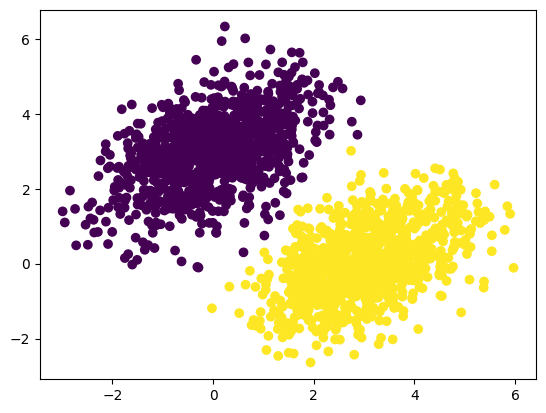

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

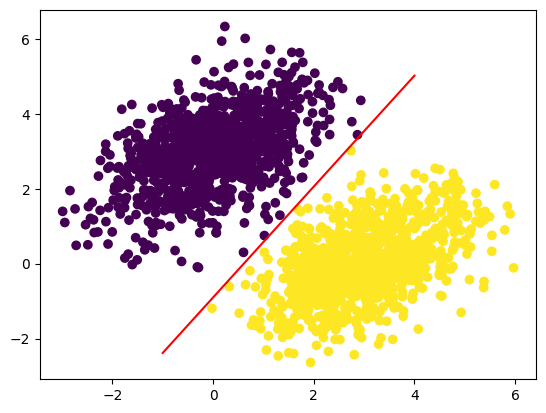

In [15]:
x = np.linspace(-1, 4, 100) # ←----在−1和4之间生成100个等间距的数字，用于绘制直线
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # ←----直线方程
plt.plot(x, y, "-r")                     #  ←----绘制直线（"-r"的含义是“将图像绘制为红色的线”）3
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # ←----在同一张图上绘制模型预测结果